In [99]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [100]:
# Define parameters

omega = 2 * np.pi * 6.826  # Cavity frequency (nu_c = 6.826 GHz)
kappa = 2 * np.pi * 4.3e-3  # Dissipation rate (kappa / 2 pi = 4.3 MHz)
epsilon = np.sqrt(10) * np.abs(omega - 0.5j * kappa)
alpha = -epsilon / (omega - 0.5j * kappa)

In [101]:
# Define cavity-only simulation parameters

# Define the cavity dimension (number of Fock states)
N = 23
# Create the annihilation operator for the cavity
d = qt.destroy(N)
# Define initial state (ground state)
psi0 = qt.basis(N, 0)
# Define time points for evolution
t_range = np.linspace(0, 100, 1000) * 1e9
# Master equation solver options
options = options = dict(
    store_states=True,
    progress_bar=True,
    nsteps=int(1e6),
    rtol=1e-4,
    atol=1e-4,
    max_step=1.0,
)

In [102]:
# Simulate displaced cavity

# Define collapse operators
c_ops = [np.sqrt(kappa) * d]
# Define the Hamiltonian
H = omega * d.dag() * d
# Solve the master equation
dispalced_result = qt.mesolve(H, psi0, t_range, c_ops, options=options)

10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   0.06s. Est. time left: 00:00:00:00
30.0%. Run time:   0.09s. Est. time left: 00:00:00:00
40.0%. Run time:   0.12s. Est. time left: 00:00:00:00


50.1%. Run time:   0.15s. Est. time left: 00:00:00:00
60.1%. Run time:   0.18s. Est. time left: 00:00:00:00
70.1%. Run time:   0.22s. Est. time left: 00:00:00:00
80.1%. Run time:   0.25s. Est. time left: 00:00:00:00
90.1%. Run time:   0.27s. Est. time left: 00:00:00:00
100.0%. Run time:   0.30s. Est. time left: 00:00:00:00
Total run time:   0.30s


In [103]:
# Simulate base-frame cavity

# Define destroy operator
a = qt.destroy(N)
# Define collapse operators
c_ops = [np.sqrt(kappa) * a]
# Define the Hamiltonian
H = omega * a.dag() * a + epsilon * (a + a.dag())
# Solve the master equation
base_result = qt.mesolve(H, psi0, t_range, c_ops, options=options)

/Users/jto/.venvs/uni/lib/python3.12/site-packages/scipy/integrate/_ode.py:431: UserWarning: _zvode: Excess work done on this call. (Perhaps wrong MF.)
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


IntegratorException: Excess work done on this call. Try to increasing the nsteps parameter in the Options class

In [97]:
# Get expectation values

dispalced_result_states = dispalced_result.states
base_result_states = base_result.states

dispalced_n_exp = np.array([qt.expect(d.dag() * d, state) for state in dispalced_result_states])
base_n_exp = np.array([qt.expect(a.dag() * a, state) for state in base_result_states])

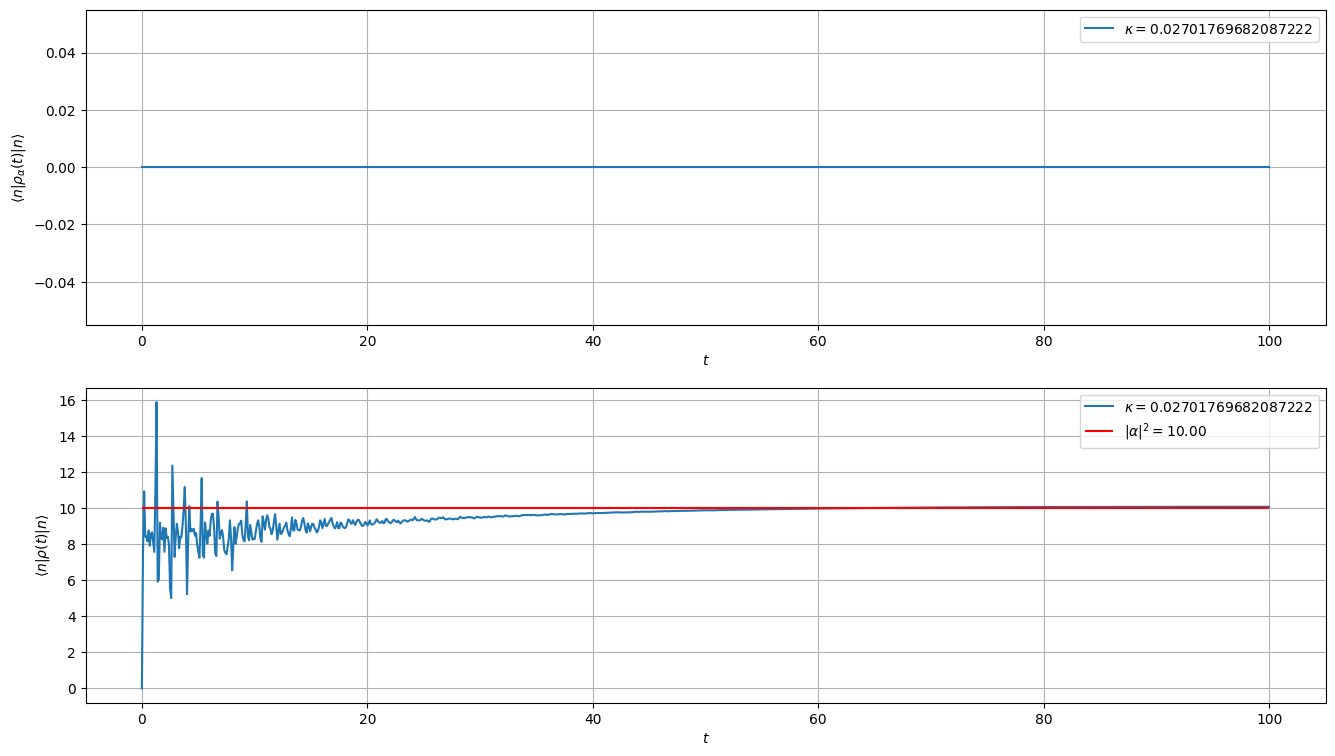

In [98]:
# Plot the results

fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(t_range, dispalced_n_exp, label=f'$\\kappa = {kappa}$')
ax2.plot(t_range, base_n_exp, label=f'$\\kappa = {kappa}$')
ax2.hlines(np.abs(alpha)**2, t_range.min(), t_range.max(), colors='r',
           label=f'$|\\alpha|^2 = {np.abs(alpha)**2:.2f}$')

ax1.set_xlabel('$t$')
ax1.set_ylabel('$\\langle n|\\rho_{\\alpha}(t)|n\\rangle$')
ax1.grid(True)
ax1.legend()

ax2.set_xlabel('$t$')
ax2.set_ylabel('$\\langle n|\\rho(t)|n\\rangle$')
ax2.grid(True)
ax2.legend()

plt.show()